# 07.범주형 자료 분석

## 1.package 설치

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 기본세팅
# 에러화면 세팅
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.simplefilter(action = 'ignore', category = UserWarning)

# 테마 설정
sns.set_theme(style = "darkgrid")

# 음수 기호 처
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [ ]:
eda_df = pd.read_csv('07.EDA.csv', encoding="cp949")
eda_df.head(10)

,id,sex,mrg,age,weight
0,1,1,1,18,40
1,2,2,2,23,50
2,3,1,2,23,56
3,4,2,2,20,51
4,5,1,1,22,55
5,6,1,1,24,61
6,7,2,2,21,70
7,8,2,2,60,44
8,9,2,1,25,66
9,10,1,2,20,60


### 2.2 자료구조 살펴보기

In [ ]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      62 non-null     int64
 1   sex     62 non-null     int64
 2   mrg     62 non-null     int64
 3   age     62 non-null     int64
 4   weight  62 non-null     int64
dtypes: int64(5)
memory usage: 2.6 KB


In [ ]:
eda_df.shape

(62, 5)

In [ ]:
eda_df.dtypes

id        int64
sex       int64
mrg       int64
age       int64
weight    int64
dtype: object

### 2.3 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [ ]:
eda_df['sex'] = eda_df['sex'].replace ([1,2], ['남자','여자'])
eda_df['mrg'].replace({1:'결혼', 2:'기혼'}, inplace=True)

eda_df.head()

,id,sex,mrg,age,weight
0,1,남자,결혼,18,40
1,2,여자,기혼,23,50
2,3,남자,기혼,23,56
3,4,여자,기혼,20,51
4,5,남자,결혼,22,55


In [ ]:
eda_df.dtypes

id         int64
sex       object
mrg       object
age        int64
weight     int64
dtype: object

In [ ]:
# datatype을 categroy로 변경
eda_df['sex'] = eda_df['sex'].astype('category')
eda_df['mrg'] = eda_df['mrg'].astype('category')

In [ ]:
eda_df.dtypes

id           int64
sex       category
mrg       category
age          int64
weight       int64
dtype: object

## 3.범주형 변수(1개) (one categorical)

### 3.1 돗수분포표(freq_table)

In [ ]:
# value_counts()
eda_df['sex'].value_counts()

sex
남자    33
여자    29
Name: count, dtype: int64

In [ ]:
freq_table = pd.DataFrame(eda_df['sex'].value_counts())
freq_table.columns = ['count']
freq_table

,count
sex,
남자,33
여자,29


In [ ]:
### crosstab이용
freq_table = pd.crosstab(index = eda_df["sex"],
                         columns = ['count'])
freq_table

col_0,count
sex,
남자,33
여자,29


In [ ]:
# 비율 추가
freq_table['prop'] = np.round(freq_table['count']/sum(freq_table['count']), 2)
freq_table

col_0,count,prop
sex,,
남자,33,0.53
여자,29,0.47


In [ ]:
# 누적 비율
freq_table['cum_prop'] = np.cumsum(freq_table['prop'])
freq_table

col_0,count,prop,cum_prop
sex,,,
남자,33,0.53,0.53
여자,29,0.47,1.00


### 3.2 그래프 그리기(막대 그래프)

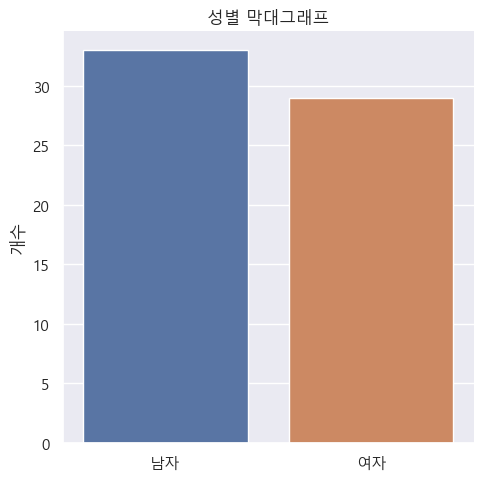

In [ ]:
# 범주형 변수(막대그래프)
g = sns.catplot(x = "sex",
                kind = "count",
                data = eda_df)
g.set(title = "성별 막대그래프",
      xlabel = "",
      ylabel = "개수")
plt.show()

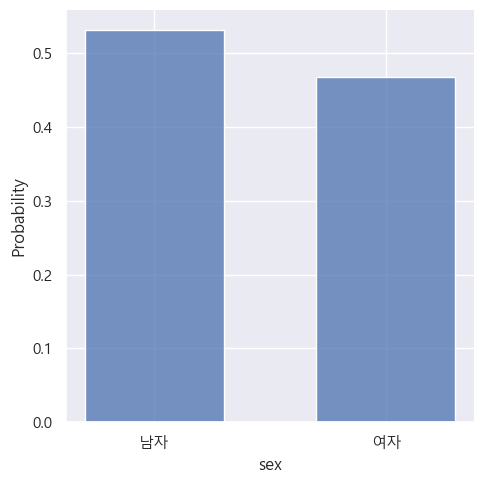

In [ ]:
# 비율 hist
sns.displot(x = "sex",
            shrink=.6,
            stat = "probability",
            kind = "hist",
            data = eda_df)
plt.show()

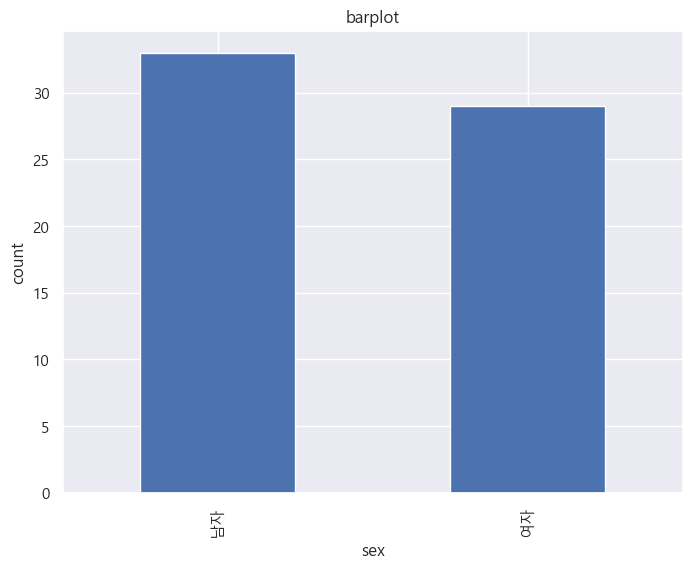

In [ ]:
#pd_plot 이용
ax = freq_table["count"].plot(figsize = (8, 6),
                              kind = "bar")
ax.set(title = 'barplot',
       xlabel = 'sex',
       ylabel = "count")
plt.show()

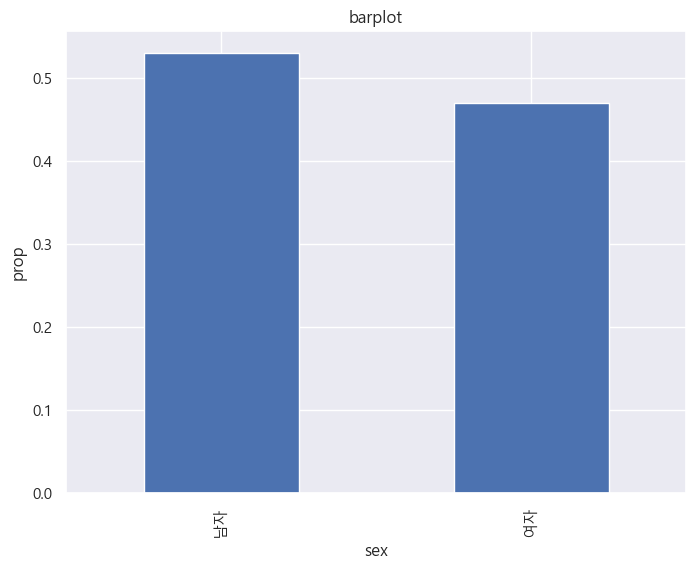

In [ ]:
#pd_plot 이용(비율)
ax = freq_table["prop"].plot(figsize = (8, 6),
                              kind = "bar")
ax.set(title = 'barplot',
       xlabel = 'sex',
       ylabel = "prop")
plt.show()

## 4.범주형 변수(2개)

### 4.1 분할표(Cross-tablation)

In [ ]:
# 방법1
eda_df.groupby(["sex","mrg"])["mrg"].count().unstack("mrg")

mrg,결혼,기혼
sex,,
남자,15,18
여자,15,14


In [ ]:
# 방법2
cross_table = pd.crosstab(index = eda_df["sex"],
                         columns = eda_df["mrg"])
cross_table

mrg,결혼,기혼
sex,,
남자,15,18
여자,15,14


In [ ]:
# margins
cross_table = pd.crosstab(index = eda_df["sex"],
                          columns = eda_df["mrg"],
                          margins = True)
# cross_table.index = ["남자","여자"]
cross_table

mrg,결혼,기혼,All
sex,,,
남자,15,18,33
여자,15,14,29
All,30,32,62


In [ ]:
# 정리
cross_table.index = ["남자","여자", "열전체"]
cross_table.columns = ["결혼","기혼","행전체"]

cross_table

,결혼,기혼,행전체
남자,15,18,33
여자,15,14,29
열전체,30,32,62


In [ ]:
# 전체비율
cross_table/cross_table.loc["열전체","행전체"]

,결혼,기혼,행전체
남자,0.241935,0.290323,0.532258
여자,0.241935,0.225806,0.467742
열전체,0.483871,0.516129,1.000000


In [ ]:
# 열비율
cross_table/cross_table.loc["열전체"]

,결혼,기혼,행전체
남자,0.5,0.5625,0.532258
여자,0.5,0.4375,0.467742
열전체,1.0,1.0000,1.000000


In [ ]:
# 행비율
cross_table.div(cross_table["행전체"], axis=0)

,결혼,기혼,행전체
남자,0.454545,0.545455,1.0
여자,0.517241,0.482759,1.0
열전체,0.483871,0.516129,1.0


In [ ]:
# 전체비율 저장
cross_table_prop = cross_table/cross_table.loc["열전체","행전체"]

In [ ]:
cross_table_prop

,결혼,기혼,행전체
남자,0.241935,0.290323,0.532258
여자,0.241935,0.225806,0.467742
열전체,0.483871,0.516129,1.000000


### 4.2 그래프 그리기(막대 그래프)

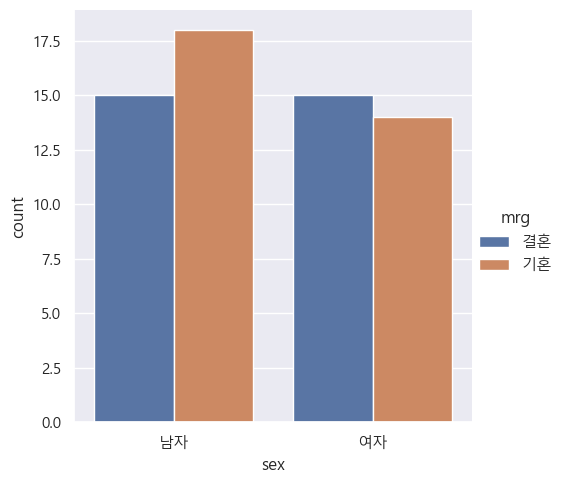

In [ ]:
# 누적 막대그래프(count)
sns.catplot(x = "sex",
            hue = "mrg",
            kind = "count",
            data = eda_df)
plt.show()

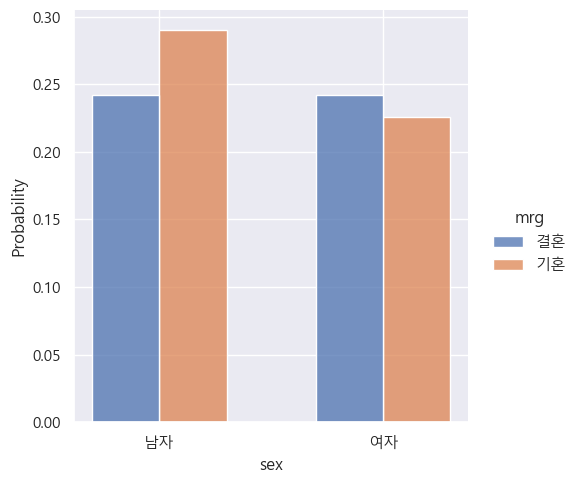

In [ ]:
# 누적 막대그래프(hist) + 비율
sns.displot(x = "sex",
            shrink = .6,
            stat = "probability",
            hue = "mrg",
            multiple = "dodge",
            kind = "hist",
            data = eda_df)
plt.show()

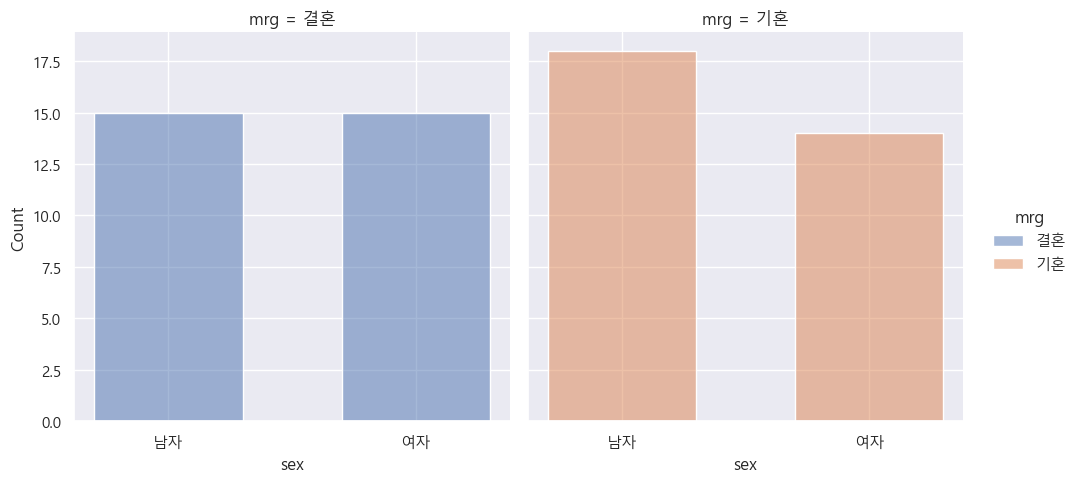

In [ ]:
# 누적 막대그래프
sns.displot(x = "sex",
            shrink = .6,
            hue = "mrg",
            col = "mrg",
            kind = "hist",
            data = eda_df)
plt.show()

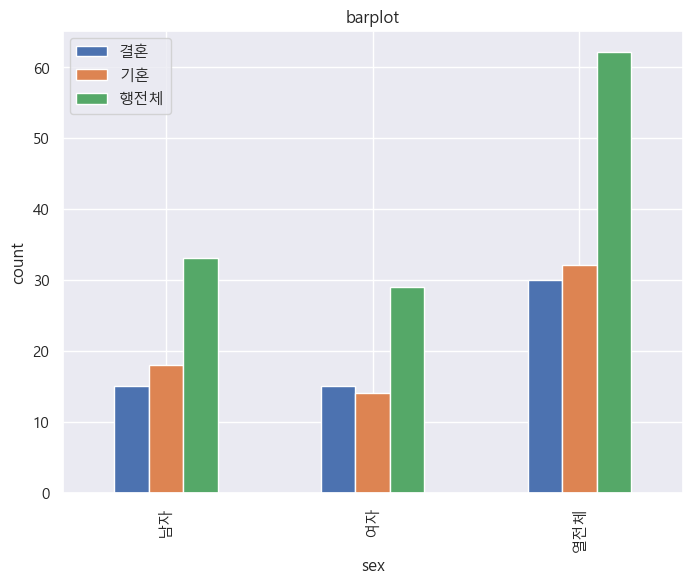

In [ ]:
# pd plot
ax = cross_table.plot(figsize = (8, 6),
                      kind = "bar")
ax.set(title = 'barplot',
       xlabel = 'sex',
       ylabel = "count")
plt.show()

# 연습문제

- 07.온라인게임.csv를 이용하여 범주형 자료를 분석하세요.
  - Q1.성별: 1=남자, 2=여자
  - Q2. 학력: 1=고등학생이하, 2=고등학교졸업, 3=대학생, 4=대학생
이상
  - Q3.성별(sex)의 돗수분포표, 막대그래프(돗수), 막대그래프(비율),
  - Q4.학력(school)의 돗수분포표, 막대그래프(돗수), 막대그래프(비율
),
  - Q5.성별(sex)과 학력(school)의 이원분할표, 막대그래프